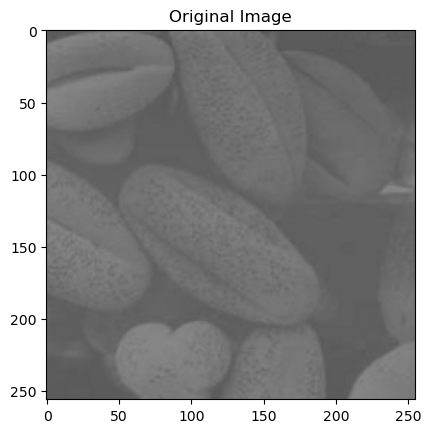

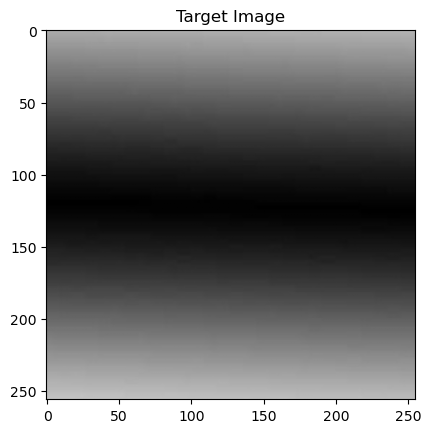

(256, 255)
(256, 255)


In [39]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("Images/Low Contrast.png", cv2.IMREAD_GRAYSCALE)
target = cv2.imread("outputImages/target.jpg", cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title("Original Image")
plt.show()

plt.imshow(target, cmap='gray', vmin=0, vmax=255)
plt.title("Target Image")
plt.show()

print(img.shape)
print(target.shape)

max_intensity = 256
no_pixels = img.shape[0] * img.shape[1]

# Sub Plot

In [46]:
def sub_plot(graphs, titles, xlabels, ylabels , figsize):
    """
    Generalized function to plot multiple bar/line charts side by side

    graphs: list of (x, y, type) where type = "bar" or "line"
    titles: list of titles for each subplot
    xlabels:  list of x-axis labels (optional)
    ylabels:  list of y-axis labels (optional)
    figsize: touple for figure size
    """

    n = len(graphs)
    plt.figure(figsize=figsize)

    for i, (x ,y, gtype) in enumerate(graphs, 1):
        plt.subplot(1, n, i)

        if gtype == "bar":
            plt.bar(x, y, width=1)
        elif gtype == "line":
            plt.plot(x, y)

        plt.title(titles[i-1])
        if xlabels and i-1 < len(xlabels):
            plt.xlabel(xlabels[i-1])
        if ylabels and i-1 < len(ylabels):
            plt.ylabel(ylabels[i-1])

    plt.tight_layout()
    plt.show()



In [38]:
"""
import os

os.makedirs("outputImages", exist_ok=True)

ttt = cv2.imread("Images/mask4.jpg", cv2.IMREAD_GRAYSCALE)


if ttt is None:
    print("Error: Could not read the image")
else:
    print("Success: Image is loaded")

    cubic  = cv2.resize(ttt, (255, 256), interpolation = cv2.INTER_CUBIC)

    success = cv2.imwrite("outputImages/target.jpg", cubic)
    if success:
        print("Image is successfully saved")
    else:
        print("Could not save")

target = cv2.imread("outputImages/target.jpg", cv2.IMREAD_GRAYSCALE)
print(target.shape)
plt.imshow(target, cmap='gray', vmin=0, vmax=255)
plt.title("Resized Target Image")
plt.show()
"""

'\nimport os\n\nos.makedirs("outputImages", exist_ok=True)\n\nttt = cv2.imread("Images/mask4.jpg", cv2.IMREAD_GRAYSCALE)\n\n\nif ttt is None:\n    print("Error: Could not read the image")\nelse:\n    print("Success: Image is loaded")\n\n    cubic  = cv2.resize(ttt, (255, 256), interpolation = cv2.INTER_CUBIC)\n\n    success = cv2.imwrite("outputImages/target.jpg", cubic)\n    if success:\n        print("Image is successfully saved")\n    else:\n        print("Could not save")\n\ntarget = cv2.imread("outputImages/target.jpg", cv2.IMREAD_GRAYSCALE)\nprint(target.shape)\nplt.imshow(target, cmap=\'gray\', vmin=0, vmax=255)\nplt.title("Resized Target Image")\nplt.show()\n'

# Histogram Calculation

In [47]:
def calculate_histogram(image):
    """
    Calculates the histogram, PDF, CDF, and Sk for a given grayscale image.

    Args:
        image: A NumPy array representing the grayscale image.

    Returns:
        A tuple containing:
            - histogram: NumPy array of histogram counts.
            - pdf: NumPy array of probability density function values.
            - cdf: NumPy array of cumulative distribution function values.
            - sk: NumPy array of mapped intensity values (integers).
    """

    histogram = np.zeros(max_intensity, dtype=int)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            pixel_value = image[i, j]
            histogram[pixel_value] += 1

    pdf = np.round(histogram / no_pixels, 2)
    cdf = np.round(pdf.cumsum(), 2)
    sk_double = np.round(cdf* (max_intensity - 1), 2)
    sk = np.round(sk_double.astype(int))

    return histogram, pdf, cdf, sk


    

# Histogram Equalization

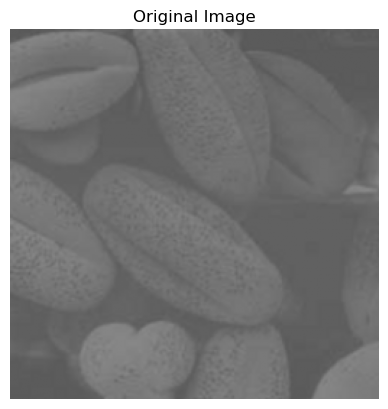

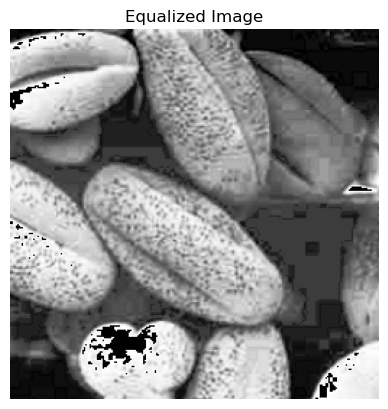

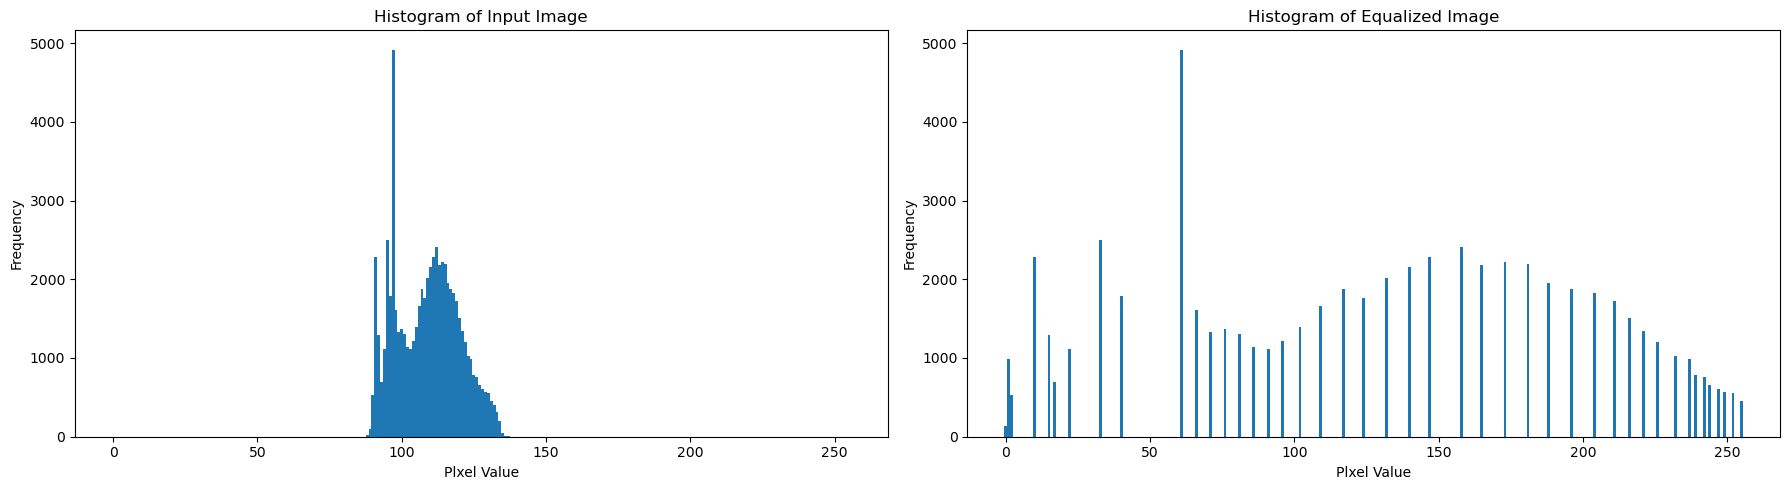

In [49]:
histogram, pdf_pr, cdf_sk, sk = calculate_histogram(img)

equalized_image = np.zeros_like(img)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        original_pixel = img[i, j]
        equalized_image[i, j] = sk[original_pixel]

equalized_histogram, _, _, _ = calculate_histogram(equalized_image)

plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title("Original Image")
plt.axis('off')
plt.show()

plt.imshow(equalized_image, cmap='gray', vmin=0, vmax=255)
plt.title("Equalized Image")
plt.axis('off')
plt.show()

graph = [
    (range(max_intensity), histogram, "bar"),
    (range(max_intensity), equalized_histogram, "bar"),
]
titles = ["Histogram of Input Image", "Histogram of Equalized Image"]
xlabels = ["Plxel Value", "Plxel Value"]
ylabels = ["Frequency", "Frequency"]
sub_plot(graph, titles, xlabels, ylabels, figsize=(18, 5))

# Histogram Specification

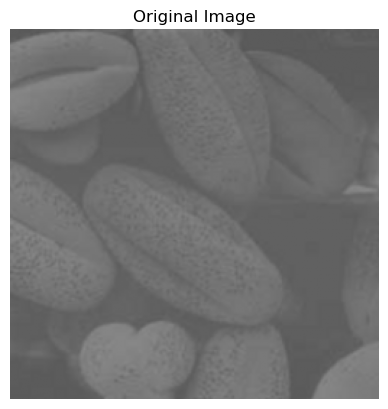

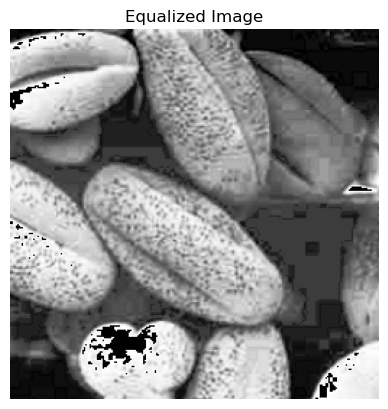

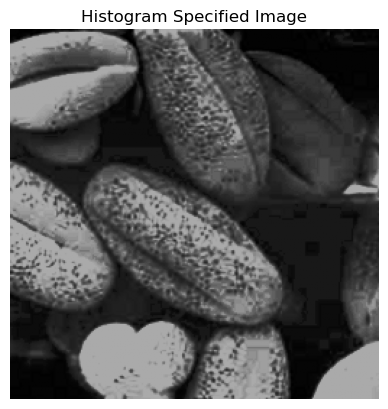

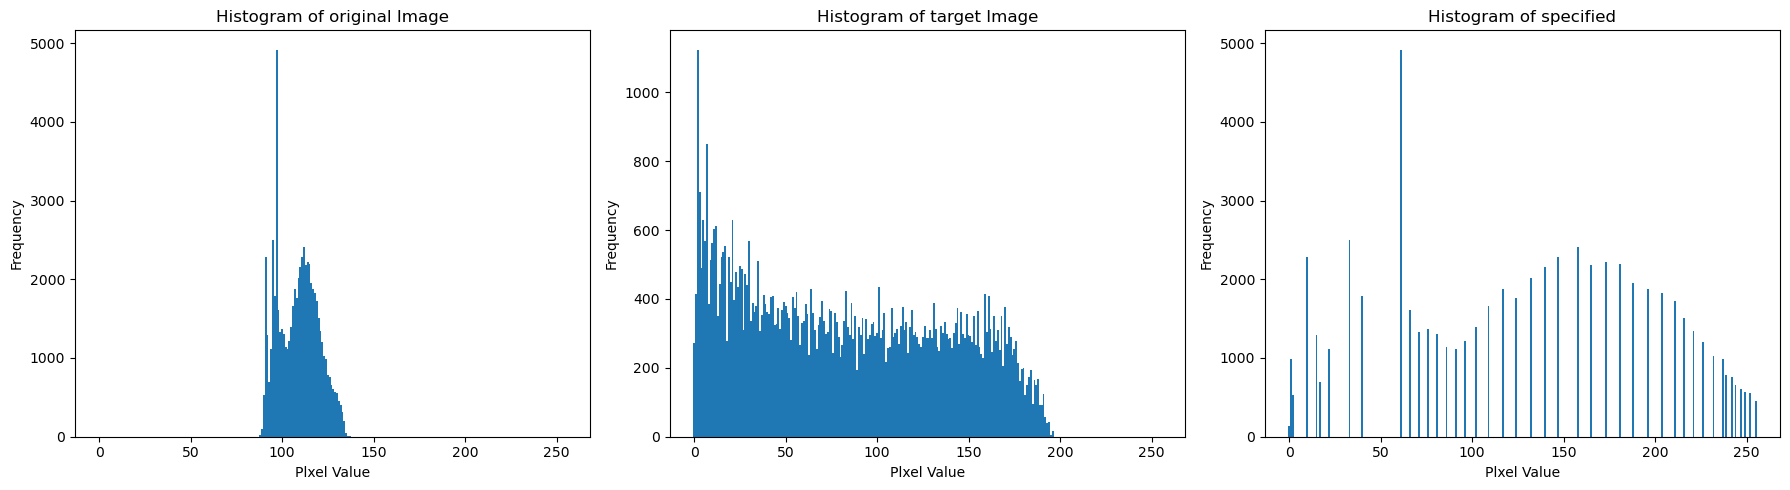

In [50]:
target_histogram, target_pdf, target_cdf, target_sk = calculate_histogram(target)

mapping= np.zeros(max_intensity, dtype=int)
for original_pixel_value in range(max_intensity):
    original_sk_value = sk[original_pixel_value]
    closest_target_index = np.argmin(np.abs(target_sk - original_sk_value))
    mapping[original_pixel_value] = closest_target_index

specified_image = np.zeros_like(img)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        original_pixel_value = img[i, j]
        specified_image[i, j] = mapping[original_pixel_value]



specified_histogram, _, _, _ = calculate_histogram(equalized_image)

plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title("Original Image")
plt.axis('off')
plt.show()

plt.imshow(equalized_image, cmap='gray', vmin=0, vmax=255)
plt.title("Equalized Image")
plt.axis('off')
plt.show()

plt.imshow(specified_image, cmap='gray', vmin=0, vmax=255)
plt.title("Histogram Specified Image")
plt.axis('off')
plt.show()

graph = [
    (range(max_intensity), histogram, "bar"),
    (range(max_intensity), target_histogram, "bar"),
    (range(max_intensity), specified_histogram, "bar"),
]
titles = ["Histogram of original Image", "Histogram of target Image", "Histogram of specified"]
xlabels = ["Plxel Value", "Plxel Value", "Plxel Value"]
ylabels = ["Frequency", "Frequency", "Frequency"]
sub_plot(graph, titles, xlabels, ylabels, figsize=(18, 5))
